<a href="https://colab.research.google.com/github/BrianJett/Gold-Standard-Pipeline-Guide/blob/main/ML_Reasearch_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this week's investigation into gene-trait pairs and conditions, I want to investigate the relationship between the TP53 gene and esophageal cancer when accounting for age. Furthermore, I would also like to investigate the relationship between the TP53 gene and liver cancer when accounting for sex.

In [82]:
import pandas as pd
import numpy as np

In [83]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
 24418621-565E-416E-9DA5-8E4527734A5E.jpeg
'ACFrOgA124Y9G0XhSnN7s60eLSm8vmkFU_O1xKogsskN9EwY24wxqd3VT06vARi8P-ga8cu0ikclvlnWsLEMDn56-D-3NZKhv3ONgEKqWGBo0YVymmNFInfF1V5Tln0=.pdf'
'B Jett passport 2023.pdf'
 Brian_Jett.jpg
 Brian_Jett_PGN_Application.pdf
'Call with Ben Mark .gdoc'
'Case Arguments.gdoc'
 CBA0B83F-965E-4C11-9B81-1E0D7E2ECA67.jpeg
'CMN 111 Intro .gdoc'
'Colab Notebooks'
'Copy of 4 Stress Test for Teens.doc.gdoc'
'Copy of chain of infection worksheet.gdoc'
'Copy of Health Behavior Contract 2018 EXERCISE.gdoc'
'Copy of Health Behavior Contract 2018 NUTRITION.gdoc'
'Copy of Health Behavior Contract 2018 SLEEP.gdoc'
'Copy of Health Behavior Contract week 1.gdoc'
'Copy of Health Behavior Contract Week 2.gdoc'
'Copy of How to live to be 100+.gdoc'
'Copy of Me Tree.gslides'
'Copy of Neglected Heart Parts 123 OL2014.docx.gdoc'
'Copy of Opening Health Paper NV.gdoc'
'Copy of Post-Test Food Diary FALL 2016 .gdoc'
'Copy of Recruit Information Sheet.gdoc'
'Cop

In [84]:
!pip install sparse_lmm

In [85]:
esophageal_clinical_data = pd.read_csv('TCGA/TCGA_Esophageal_Cancer_(ESCA)/TCGA.ESCA.sampleMap_ESCA_clinicalMatrix', sep='\t', index_col=0)
esophageal_gene_data = pd.read_csv('TCGA/TCGA_Esophageal_Cancer_(ESCA)/TCGA.ESCA.sampleMap_HiSeqV2_PANCAN.gz',  sep='\t', index_col=0)
liver_clinical_data = pd.read_csv('TCGA/TCGA_Liver_Cancer_(LIHC)/TCGA.LIHC.sampleMap_LIHC_clinicalMatrix', sep='\t', index_col=0)
liver_gene_data = pd.read_csv('TCGA/TCGA_Liver_Cancer_(LIHC)/TCGA.LIHC.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [86]:
esophageal_clinical_data.head(5)

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,...,_GENOMIC_ID_TCGA_ESCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_ESCA_exp_HiSeq,_GENOMIC_ID_TCGA_ESCA_miRNA_HiSeq,_GENOMIC_ID_TCGA_ESCA_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_ESCA_gistic2,_GENOMIC_ID_TCGA_ESCA_gistic2thd,_GENOMIC_ID_TCGA_ESCA_mutation_broad_gene,_GENOMIC_ID_TCGA_ESCA_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_ESCA_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_ESCA_PDMRNAseqCNV
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,MSI-L,TCGA-2H-A9GF-01,TCGA-2H-A9GF,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,67,...,2666431c-515b-4088-a448-baf7c52106d8,TCGA-2H-A9GF-01A-11R-A37I-31,TCGA-2H-A9GF-01,TCGA-2H-A9GF-01A-11D-A37C-09,TCGA-2H-A9GF-01A-11D-A37B-01,TCGA-2H-A9GF-01A-11D-A37B-01,TCGA-2H-A9GF-01A-11D-A37C-09,2666431c-515b-4088-a448-baf7c52106d8,TCGA-2H-A9GF-01A-11D-A37C-09,TCGA-2H-A9GF-01
TCGA-2H-A9GG-01,MSI-L,TCGA-2H-A9GG-01,TCGA-2H-A9GG,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,66,...,9fcd3933-2651-4c64-8c77-3dac4d8ea595,TCGA-2H-A9GG-01A-11R-A37I-31,TCGA-2H-A9GG-01,NaN,NaN,NaN,NaN,9fcd3933-2651-4c64-8c77-3dac4d8ea595,NaN,NaN
TCGA-2H-A9GH-01,MSS,TCGA-2H-A9GH-01,TCGA-2H-A9GH,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,44,...,775bb1a6-0463-4e78-bc3f-596e3a5eb38f,TCGA-2H-A9GH-01A-11R-A37I-31,TCGA-2H-A9GH-01,TCGA-2H-A9GH-01A-11D-A37C-09,TCGA-2H-A9GH-01A-11D-A37B-01,TCGA-2H-A9GH-01A-11D-A37B-01,TCGA-2H-A9GH-01A-11D-A37C-09,775bb1a6-0463-4e78-bc3f-596e3a5eb38f,TCGA-2H-A9GH-01A-11D-A37C-09,TCGA-2H-A9GH-01
TCGA-2H-A9GI-01,MSS,TCGA-2H-A9GI-01,TCGA-2H-A9GI,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,68,...,3e9a405f-cb27-4773-b501-57a2eaf833d4,TCGA-2H-A9GI-01A-11R-A37I-31,TCGA-2H-A9GI-01,TCGA-2H-A9GI-01A-11D-A37C-09,TCGA-2H-A9GI-01A-11D-A37B-01,TCGA-2H-A9GI-01A-11D-A37B-01,TCGA-2H-A9GI-01A-11D-A37C-09,3e9a405f-cb27-4773-b501-57a2eaf833d4,TCGA-2H-A9GI-01A-11D-A37C-09,TCGA-2H-A9GI-01
TCGA-2H-A9GJ-01,MSS,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,57,...,67bda296-5e65-45a9-962e-a99f51a12e14,TCGA-2H-A9GJ-01A-11R-A37I-31,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ-01A-11D-A37C-09,TCGA-2H-A9GJ-01A-11D-A37B-01,TCGA-2H-A9GJ-01A-11D-A37B-01,TCGA-2H-A9GJ-01A-11D-A37C-09,67bda296-5e65-45a9-962e-a99f51a12e14,TCGA-2H-A9GJ-01A-11D-A37C-09,TCGA-2H-A9GJ-01


In [87]:
esophageal_gene_data.head(5)

,TCGA-L5-A4OF-01,TCGA-LN-A49R-01,TCGA-Z6-A9VB-01,TCGA-L5-A8NF-01,TCGA-2H-A9GG-01,TCGA-IG-A3QL-01,TCGA-VR-AA7B-01,TCGA-2H-A9GN-01,TCGA-L7-A6VZ-01,TCGA-L5-A4OF-11,...,TCGA-L5-A4ON-01,TCGA-LN-A4A1-01,TCGA-R6-A8WC-01,TCGA-L5-A4OR-11,TCGA-L5-A88Z-01,TCGA-JY-A6FG-01,TCGA-L5-A4OM-01,TCGA-Z6-A8JE-01,TCGA-L5-A4OQ-01,TCGA-M9-A5M8-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.346108,-0.900892,-0.284892,0.743108,2.075308,-2.573692,0.204308,2.126808,-0.005492,0.108108,...,0.474308,0.026308,1.397708,0.204708,-1.251092,0.742408,-0.346092,-0.051892,1.588408,1.040308
HIF3A,6.799274,-1.649026,-2.676126,1.323974,1.644074,4.542674,1.987874,-0.526626,0.983874,3.616474,...,0.793874,-2.759026,1.469874,4.360974,-2.890026,-3.941826,1.259274,5.328074,4.529274,-2.615326
RNF17,8.020965,0.335165,0.207865,-0.531035,-0.531035,0.316065,-0.197535,-0.531035,-0.200335,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.136835,-0.531035,-0.149235,0.277265,-0.531035,-0.531035
RNF10,-0.052472,-0.162772,-0.103472,0.199728,-0.143172,-0.542672,-0.081372,0.002928,0.715428,0.504128,...,0.193828,-0.111372,0.298328,0.914828,0.218628,0.984628,0.005928,-0.025472,-0.032372,0.095328
RNF11,-0.727578,0.226422,0.045122,0.040222,-0.389978,-0.189378,0.569622,0.145622,-0.591578,0.056922,...,0.014822,0.940222,-1.251278,0.592822,-0.431478,0.851022,0.293222,0.706922,-0.397778,0.120722


In [88]:
liver_clinical_data.head(5)

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adjacent_hepatic_tissue_inflammation_extent_type,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,...,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_LIHC_mutation_bcgsc_gene,_GENOMIC_ID_data/public/TCGA/LIHC/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_LIHC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_LIHC_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_LIHC_mutation_broad_gene,_GENOMIC_ID_TCGA_LIHC_hMethyl450
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S-01,TCGA-2V-A95S,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,Severe,NaN,3.5,...,53796be6-1c87-448a-9928-3c640e9d3414,NaN,TCGA-2V-A95S-01,TCGA-2V-A95S-01,53796be6-1c87-448a-9928-3c640e9d3414,NaN,53796be6-1c87-448a-9928-3c640e9d3414,53796be6-1c87-448a-9928-3c640e9d3414,NaN,TCGA-2V-A95S-01A-11D-A36Y-05
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,58.0,3.5,...,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,TCGA-2Y-A9GS-01A-12D-A383-05
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,51.0,3.5,...,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,TCGA-2Y-A9GT-01A-11D-A383-05
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,55.0,3.5,...,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,6f3f7f73-b031-424e-ba7c-263f802dd6cf,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,TCGA-2Y-A9GU-01A-11D-A383-05
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,54.0,3.5,...,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,TCGA-2Y-A9GV-01A-11D-A383-05


In [89]:
liver_gene_data.head(5)

,TCGA-FV-A495-01,TCGA-G3-A3CH-11,TCGA-CC-A3MB-01,TCGA-BC-A3KF-01,TCGA-DD-A4NV-01,TCGA-CC-A1HT-01,TCGA-BD-A3EP-01,TCGA-FV-A3R2-11,TCGA-CC-A3MA-01,TCGA-ZP-A9CV-01,...,TCGA-UB-A7ME-01,TCGA-DD-A4NR-01,TCGA-G3-A25U-01,TCGA-DD-AAE6-01,TCGA-G3-AAV2-01,TCGA-BC-A10Z-11,TCGA-ZP-A9CY-01,TCGA-DD-A39Y-01,TCGA-DD-A115-01,TCGA-FV-A3I0-11
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.317808,1.154608,1.379008,1.297208,2.152708,0.630408,1.704608,1.623908,-0.181992,2.131908,...,2.054208,2.233208,2.631908,2.681008,0.450608,1.612908,1.976308,1.730308,1.894908,1.661008
HIF3A,-0.306526,-0.170026,-1.553426,-2.617326,-0.769026,1.332674,-1.645126,-0.266926,-2.699826,-0.332026,...,-2.335226,-2.547826,-0.016726,-2.982226,-0.632926,-2.351726,-1.031826,-5.554726,-1.795626,-1.608526
RNF17,3.664565,-0.531035,-0.531035,-0.531035,-0.531035,3.990065,6.344665,-0.531035,-0.531035,-0.531035,...,0.141565,6.296965,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,-0.272872,-0.108572,0.301528,0.815528,-0.315972,0.076128,0.224028,-0.039372,-0.830372,0.447428,...,-0.101772,0.100028,-0.631672,0.693828,0.084428,0.026428,-0.024972,0.363228,0.313828,0.041328
RNF11,-1.368378,0.430122,-1.143078,-1.021978,-0.131078,-0.153778,-0.531678,-0.151678,-0.022478,-0.084578,...,-0.511478,-0.935778,-0.172778,-1.028278,-0.365578,0.075122,-0.097878,-0.338378,0.609522,0.292622


In [90]:
esophageal_gene_fullname = 'TP53'
esophageal_gene = 'tp53'
esophageal_condition = 'age'
esophageal_condition_col = 'days_to_birth'
esophageal_trait = 'Esophageal Cancer'

In [91]:
liver_gene_fullname = 'TP53'
liver_gene = 'tp53'
liver_condition = 'age'
liver_condition_col = 'days_to_birth'
liver_trait = 'Liver Cancer'

In [92]:
col_offset = len(esophageal_clinical_data.columns)
num_genes = len(esophageal_gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 120 features, and the gene dataset includes 20530 genes


In [93]:
liver_col_offset = len(liver_clinical_data.columns)
liver_num_genes = len(liver_gene_data)
print(f'The clinical dataset has {liver_col_offset} features, and the gene dataset includes {liver_num_genes} genes')

The clinical dataset has 109 features, and the gene dataset includes 20530 genes


In [94]:
esophageal_merged_data = esophageal_clinical_data.join(esophageal_gene_data.T)
esophageal_merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,MSI-L,TCGA-2H-A9GF-01,TCGA-2H-A9GF,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,67,...,0.646322,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812
TCGA-2H-A9GG-01,MSI-L,TCGA-2H-A9GG-01,TCGA-2H-A9GG,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,66,...,-0.748878,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812
TCGA-2H-A9GH-01,MSS,TCGA-2H-A9GH-01,TCGA-2H-A9GH,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,44,...,-0.301178,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788
TCGA-2H-A9GI-01,MSS,TCGA-2H-A9GI-01,TCGA-2H-A9GI,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,68,...,-0.748878,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788
TCGA-2H-A9GJ-01,MSS,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,57,...,1.729622,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188


In [95]:
liver_merged_data = liver_clinical_data.join(liver_gene_data.T)
liver_merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adjacent_hepatic_tissue_inflammation_extent_type,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S-01,TCGA-2V-A95S,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,Severe,NaN,3.5,...,-0.748878,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,58.0,3.5,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,51.0,3.5,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,55.0,3.5,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,54.0,3.5,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688


In [96]:
print(liver_merged_data.columns.tolist())

['_INTEGRATION', '_PATIENT', '_cohort', '_primary_disease', '_primary_site', 'additional_pharmaceutical_therapy', 'additional_radiation_therapy', 'adjacent_hepatic_tissue_inflammation_extent_type', 'age_at_initial_pathologic_diagnosis', 'albumin_result_lower_limit', 'albumin_result_specified_value', 'albumin_result_upper_limit', 'bcr_followup_barcode', 'bcr_patient_barcode', 'bcr_sample_barcode', 'bilirubin_lower_limit', 'bilirubin_upper_limit', 'cancer_first_degree_relative', 'child_pugh_classification_grade', 'creatinine_lower_level', 'creatinine_upper_limit', 'creatinine_value_in_mg_dl', 'days_to_birth', 'days_to_collection', 'days_to_death', 'days_to_initial_pathologic_diagnosis', 'days_to_last_followup', 'days_to_new_tumor_event_additional_surgery_procedure', 'days_to_new_tumor_event_after_initial_treatment', 'eastern_cancer_oncology_group', 'fetoprotein_outcome_lower_limit', 'fetoprotein_outcome_upper_limit', 'fetoprotein_outcome_value', 'fibrosis_ishak_score', 'followup_case_rep

In [97]:
input_cols = [esophageal_condition_col] + esophageal_merged_data.columns[col_offset: col_offset + num_genes].tolist()
esophageal_merged_data = esophageal_merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(esophageal_merged_data)
rows_after_any = len(esophageal_merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    esophageal_merged_data = esophageal_merged_data.dropna(how='any')
else:
    esophageal_merged_data = esophageal_merged_data.dropna(how='all')
    esophageal_merged_data = esophageal_merged_data.fillna(0)

esophageal_merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,-24487,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,0.646322,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812
TCGA-2H-A9GG-01,-24328,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-0.748878,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812
TCGA-2H-A9GH-01,-16197,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-0.301178,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788
TCGA-2H-A9GI-01,-25097,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-0.748878,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788
TCGA-2H-A9GJ-01,-21180,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,1.729622,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188


In [98]:
input_cols = [liver_condition_col] + liver_merged_data.columns[liver_col_offset: liver_col_offset + liver_num_genes].tolist()
liver_merged_data = liver_merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(liver_merged_data)
rows_after_any = len(liver_merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    liver_merged_data = liver_merged_data.dropna(how='any')
else:
    liver_merged_data = liver_merged_data.dropna(how='all')
    liver_merged_data = liver_merged_data.fillna(0)

liver_merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2Y-A9GS-01,-21318.0,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,-18768.0,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,-20187.0,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,-20011.0,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688
TCGA-2Y-A9GW-01,-23587.0,1.946808,-2.720726,-0.531035,0.060628,-0.660778,-0.31181,-0.215794,0.756054,0.397301,...,0.071822,1.082783,0.362567,-1.28139,-1.118377,-0.624886,0.903873,1.857205,-0.228533,0.692988


In [99]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

In [100]:
esophageal_merged_data[esophageal_trait] = esophageal_merged_data.index.to_series().apply(mark_tumor)

esophageal_merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Esophageal Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,-24487,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812,1
TCGA-2H-A9GG-01,-24328,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812,1
TCGA-2H-A9GH-01,-16197,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788,1
TCGA-2H-A9GI-01,-25097,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788,1
TCGA-2H-A9GJ-01,-21180,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188,1


In [101]:
liver_merged_data[liver_trait] = liver_merged_data.index.to_series().apply(mark_tumor)

liver_merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Liver Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2Y-A9GS-01,-21318.0,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388,1
TCGA-2Y-A9GT-01,-18768.0,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188,1
TCGA-2Y-A9GU-01,-20187.0,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088,1
TCGA-2Y-A9GV-01,-20011.0,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688,1
TCGA-2Y-A9GW-01,-23587.0,1.946808,-2.720726,-0.531035,0.060628,-0.660778,-0.31181,-0.215794,0.756054,0.397301,...,1.082783,0.362567,-1.28139,-1.118377,-0.624886,0.903873,1.857205,-0.228533,0.692988,1


In [102]:
input_cols = esophageal_merged_data.columns.tolist()
gene_list = [col for col in input_cols if esophageal_gene in col.lower()]

In [103]:
liver_input_cols = liver_merged_data.columns.tolist()
liver_gene_list = [col for col in liver_input_cols if liver_gene in col.lower()]

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

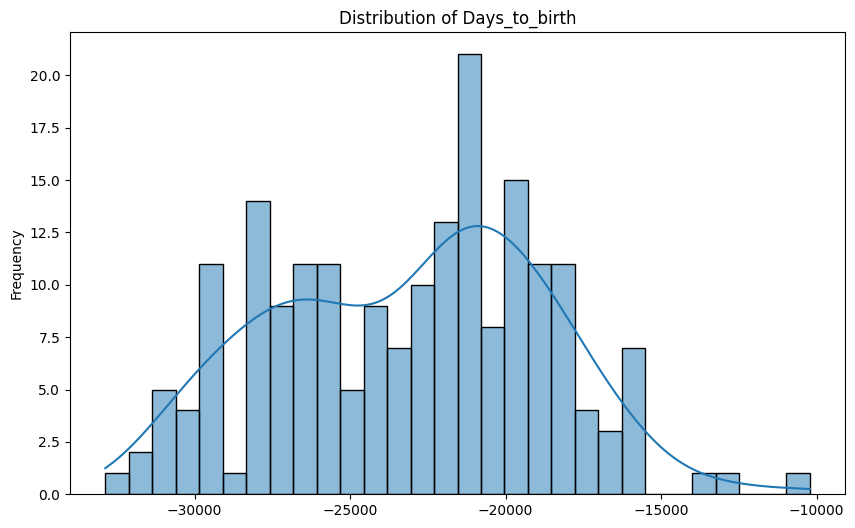

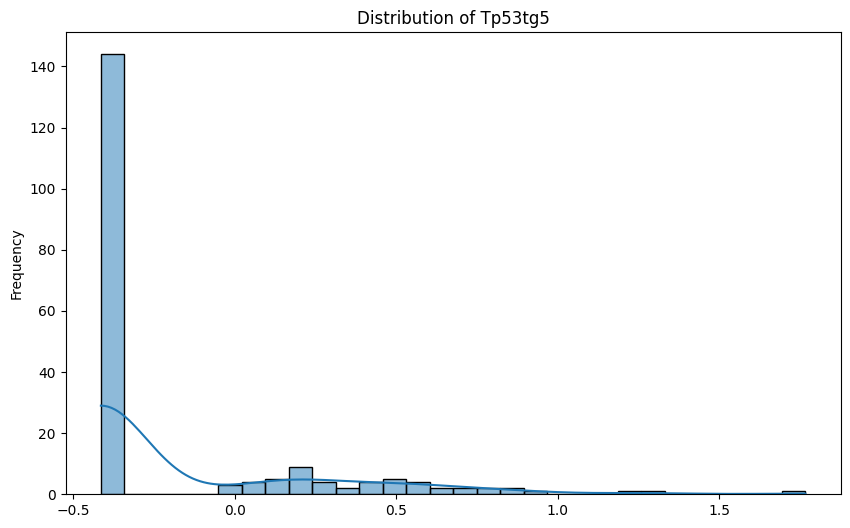

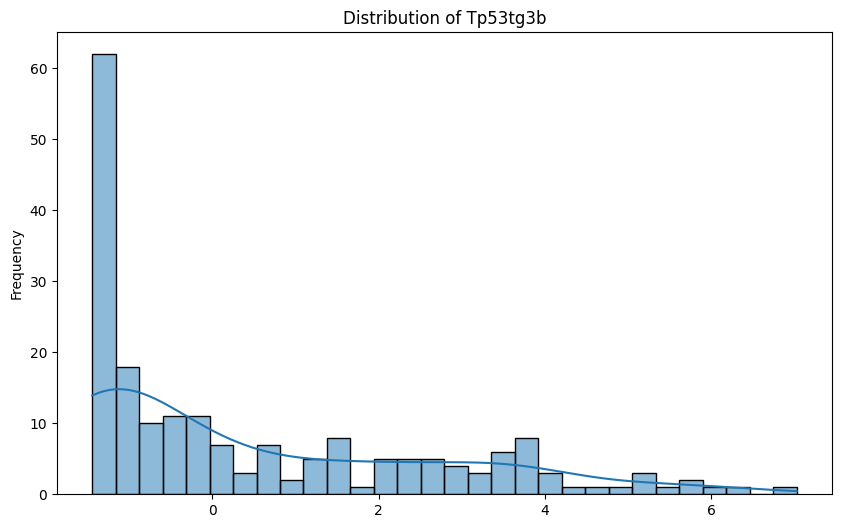

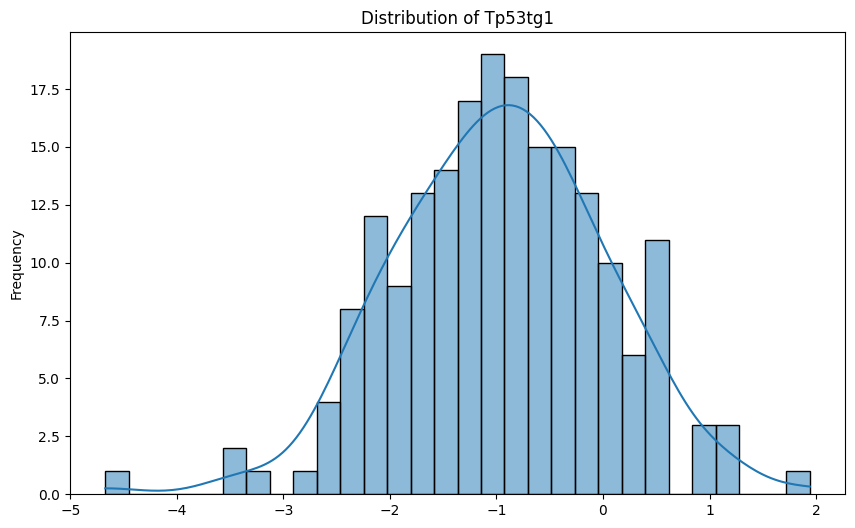

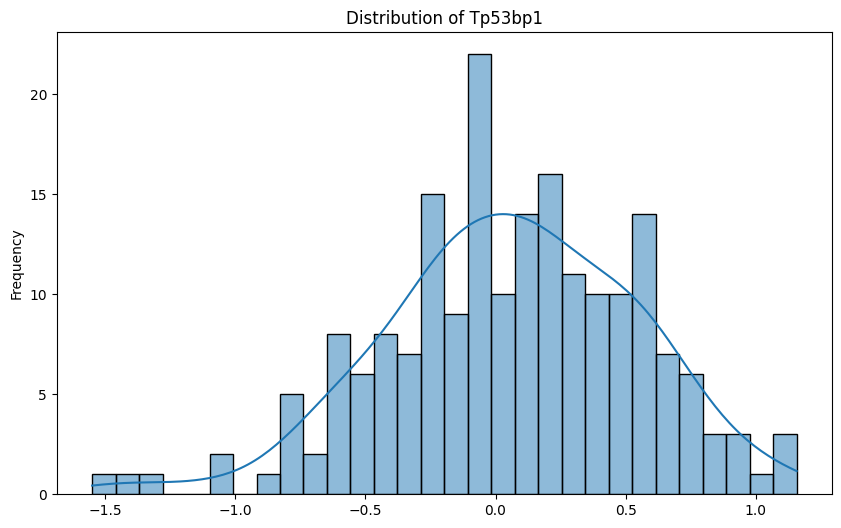

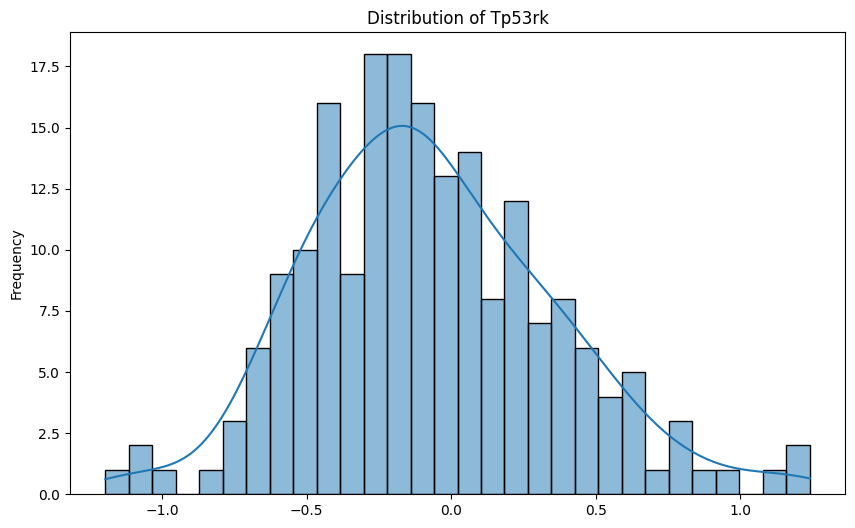

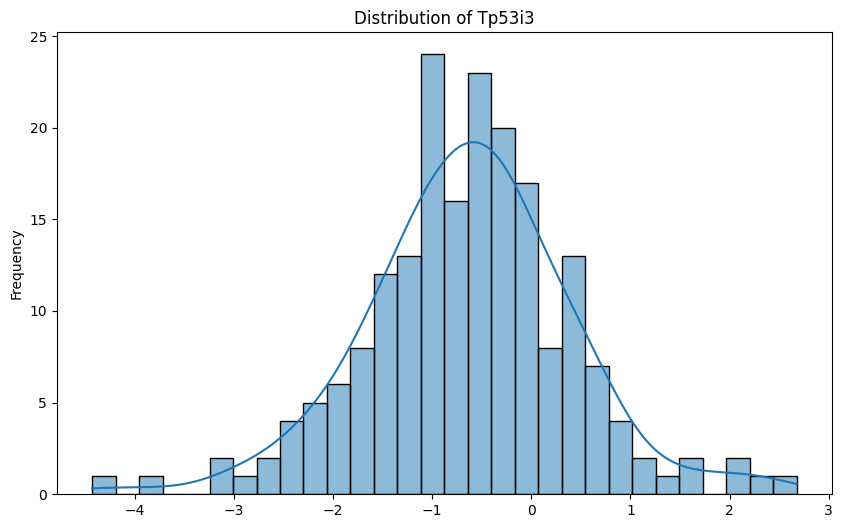

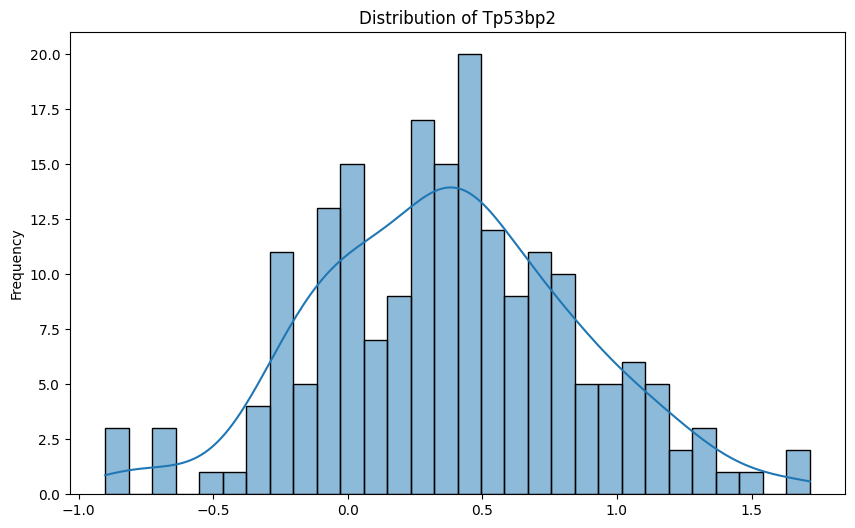

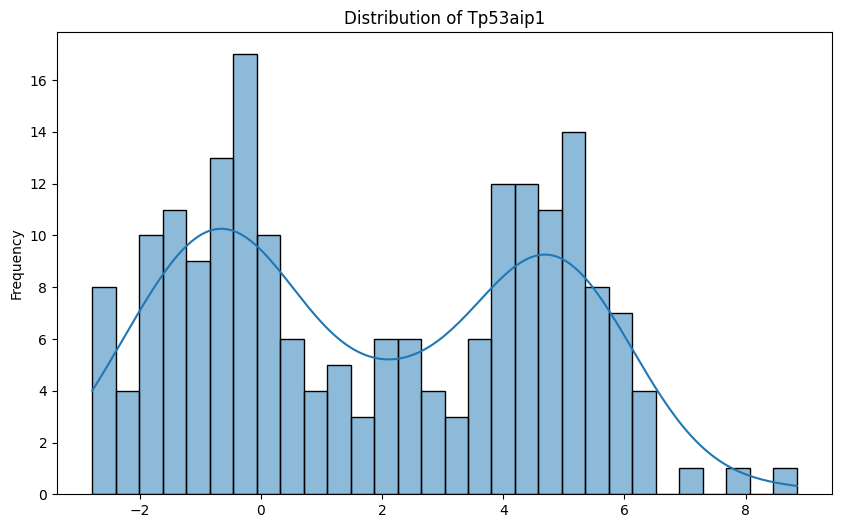

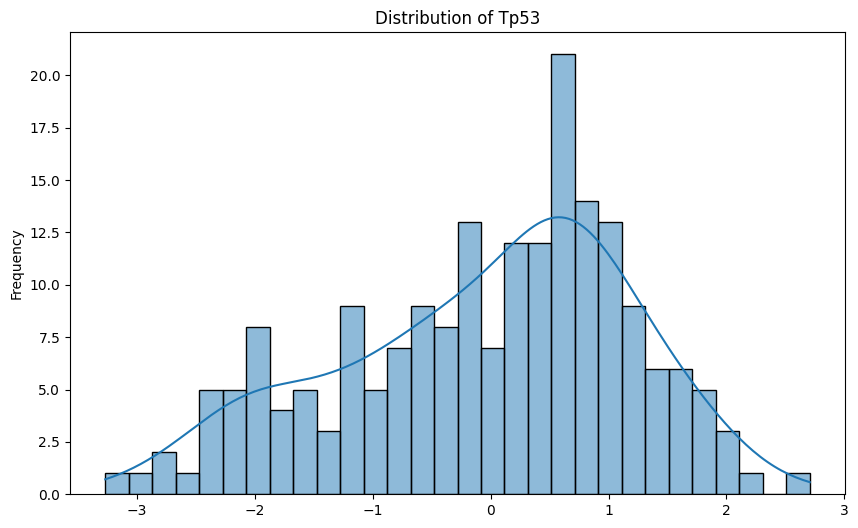

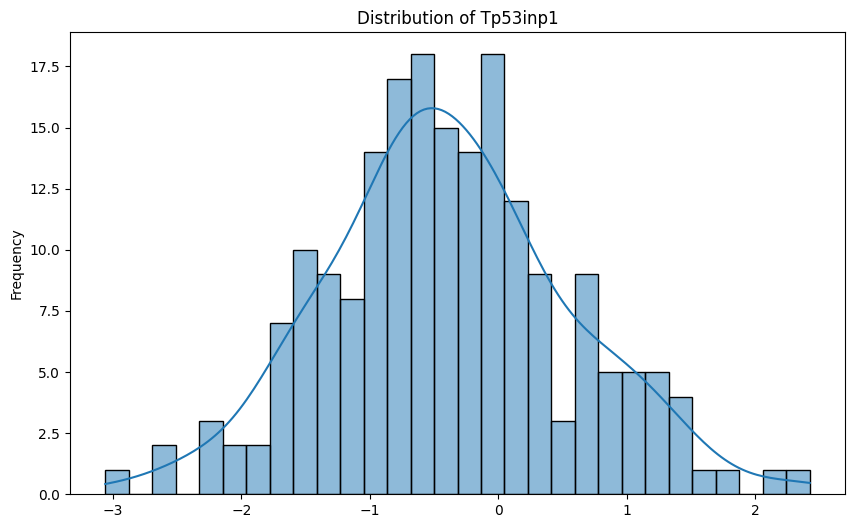

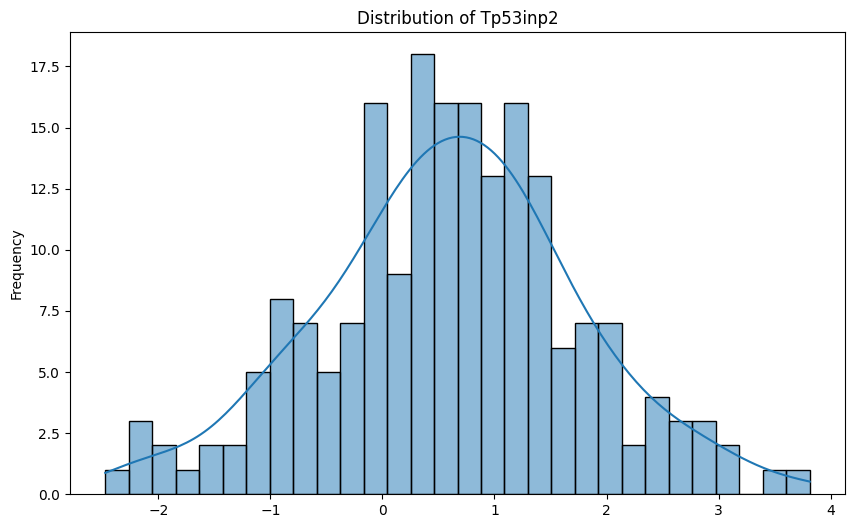

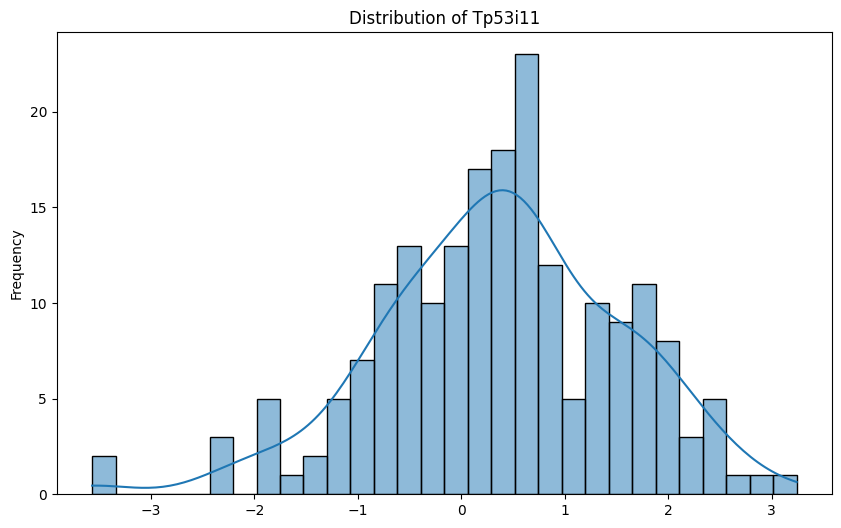

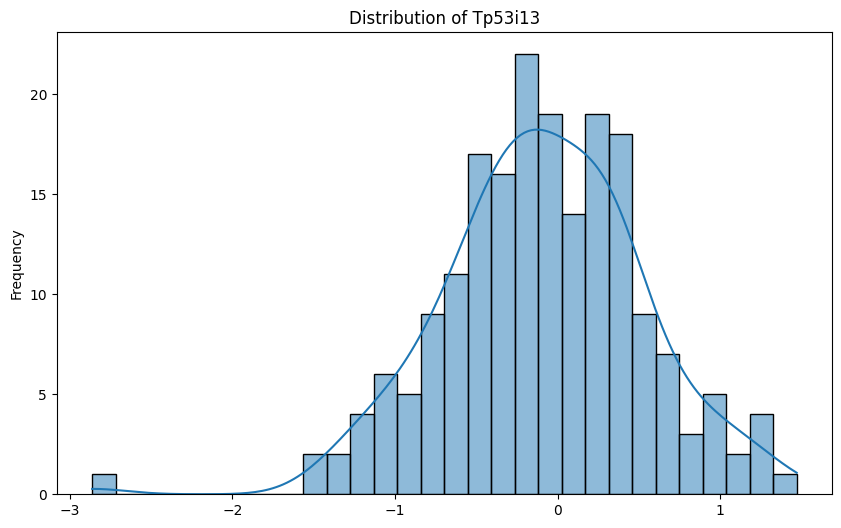

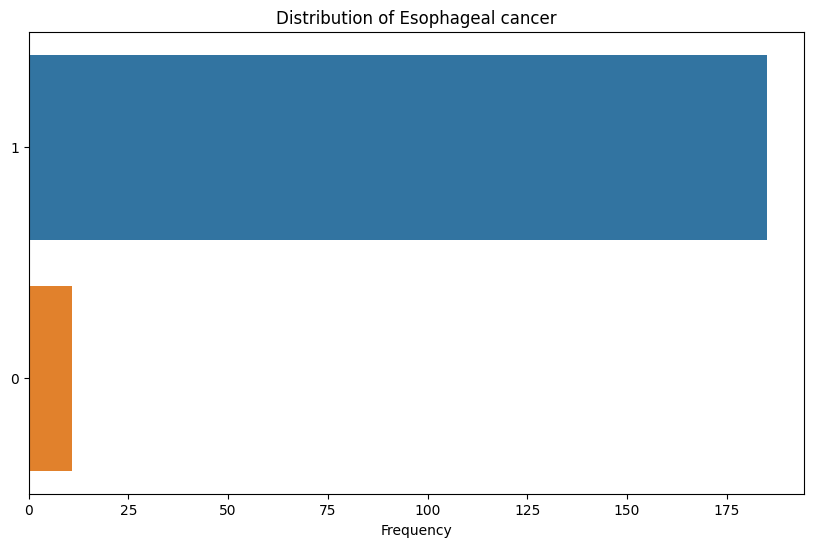

In [105]:
analyze_distributions(esophageal_merged_data, numerical_columns=[esophageal_condition_col, *gene_list], categorical_columns=[esophageal_trait])

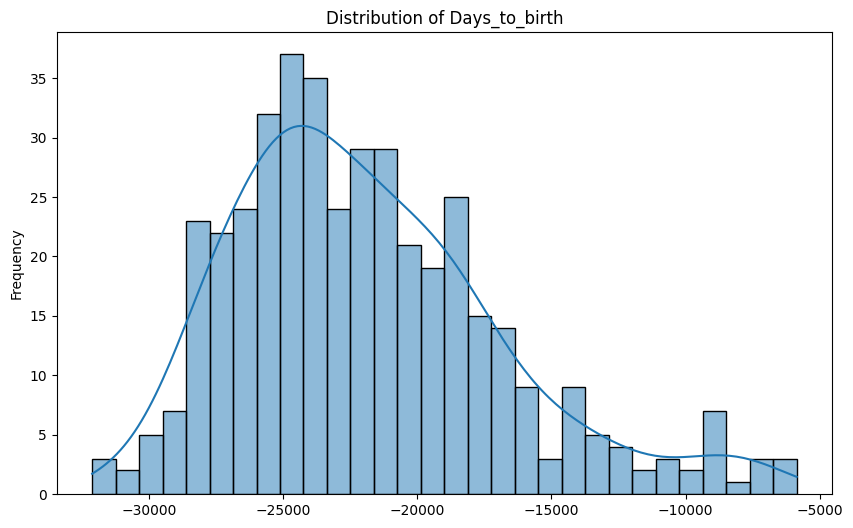

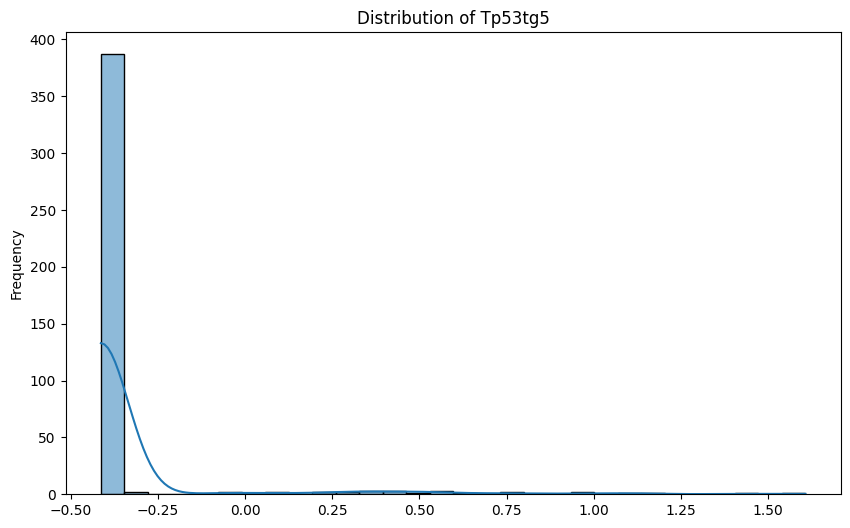

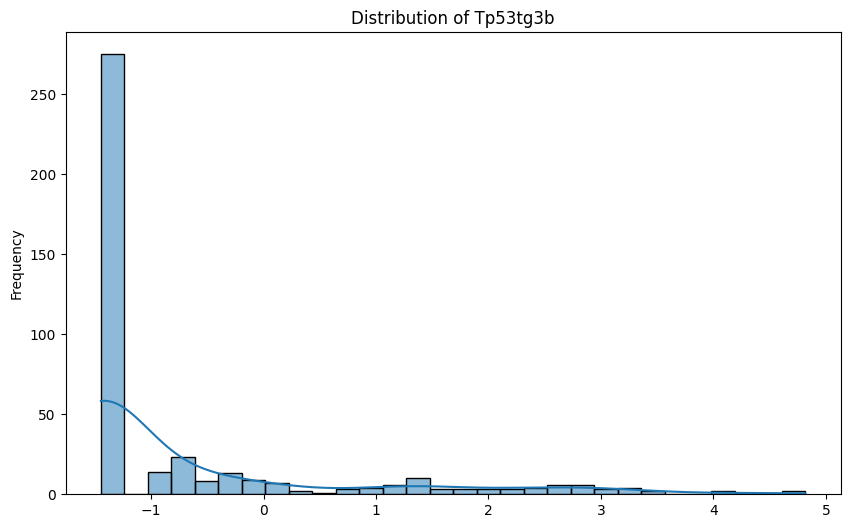

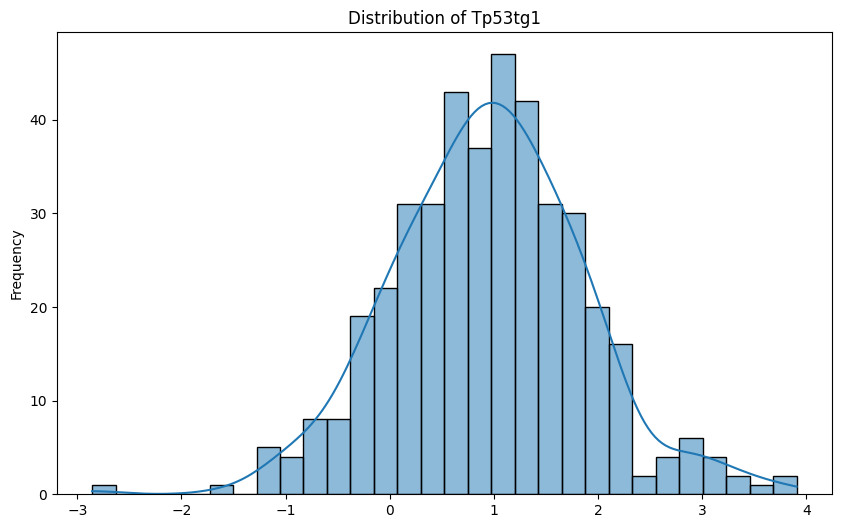

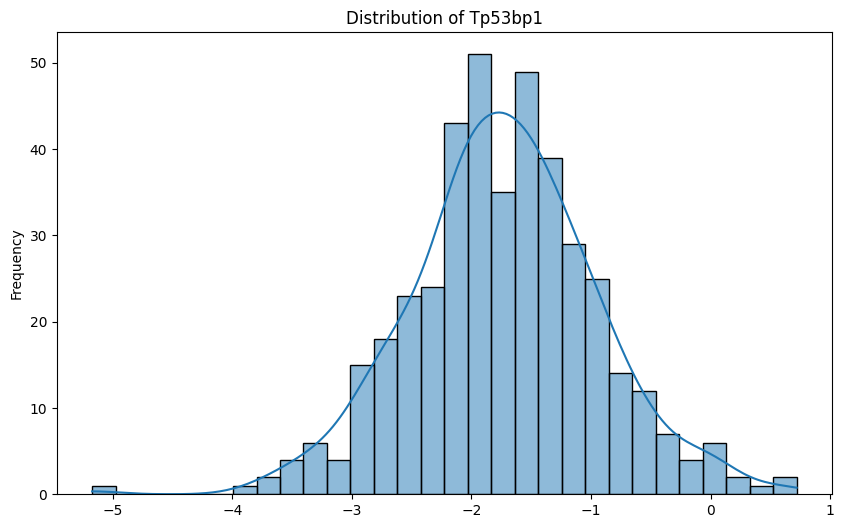

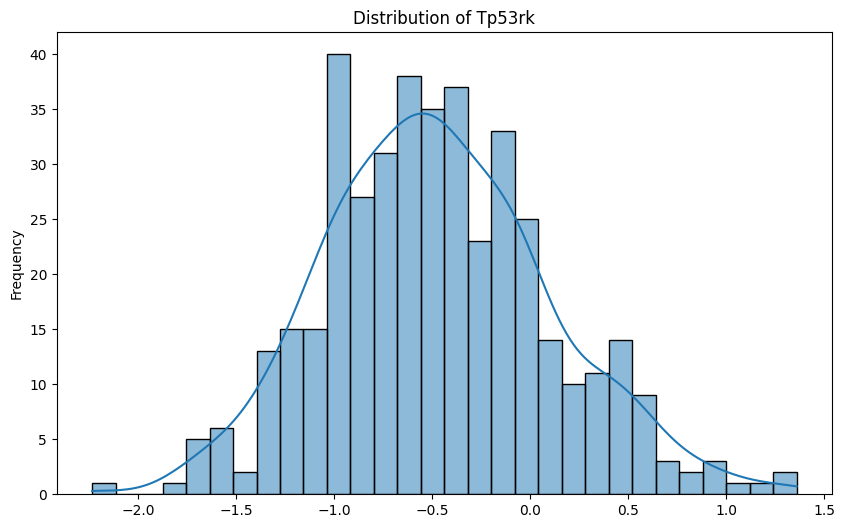

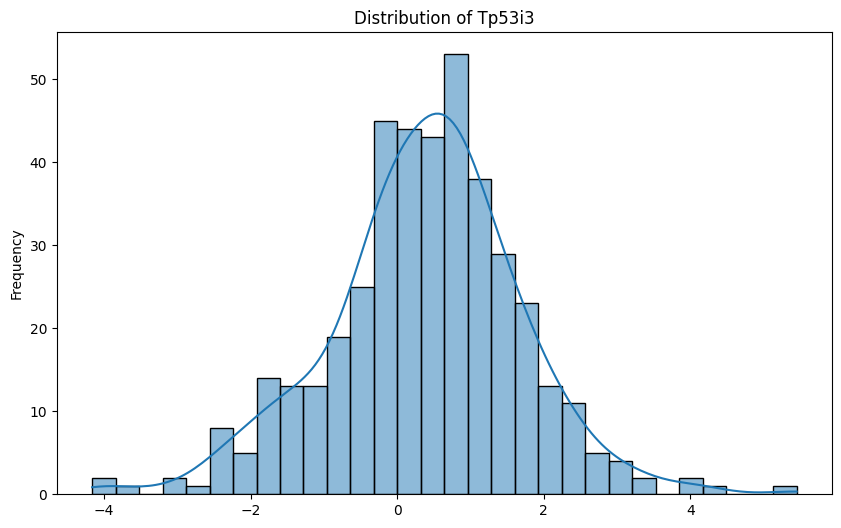

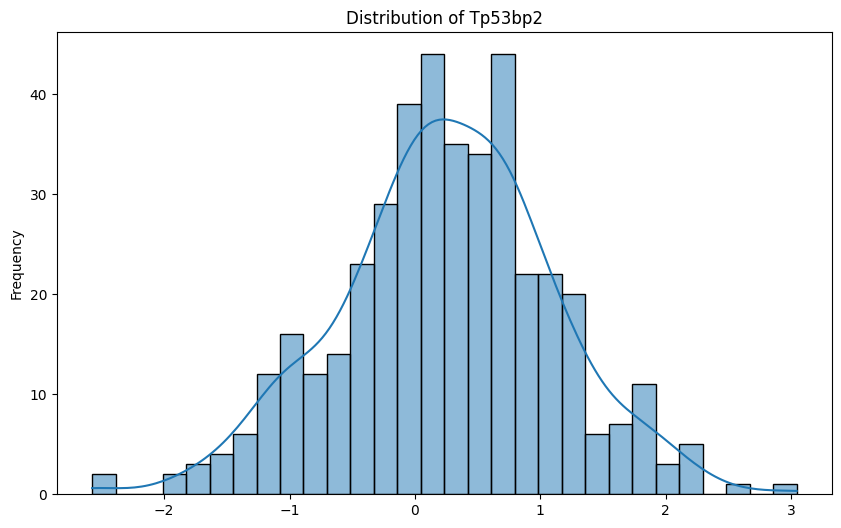

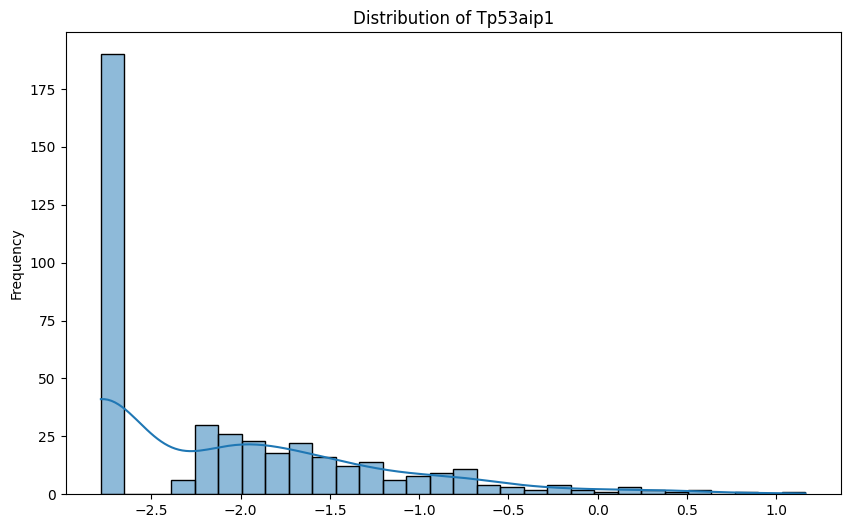

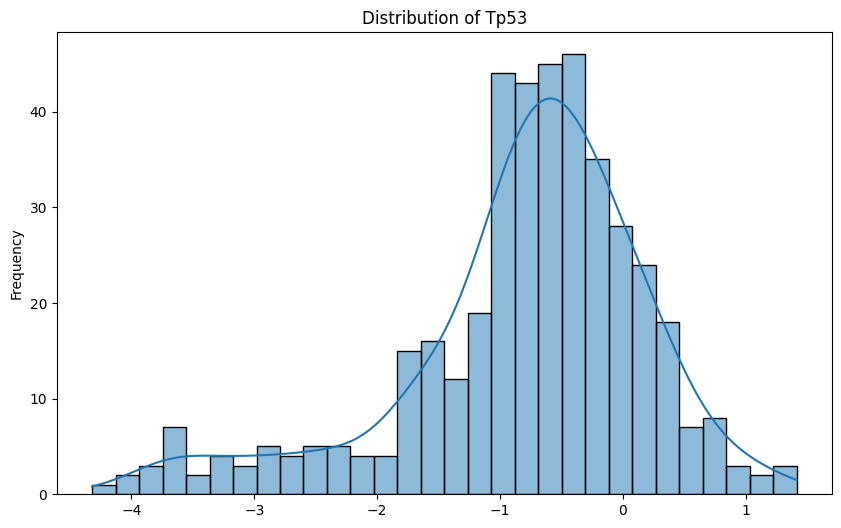

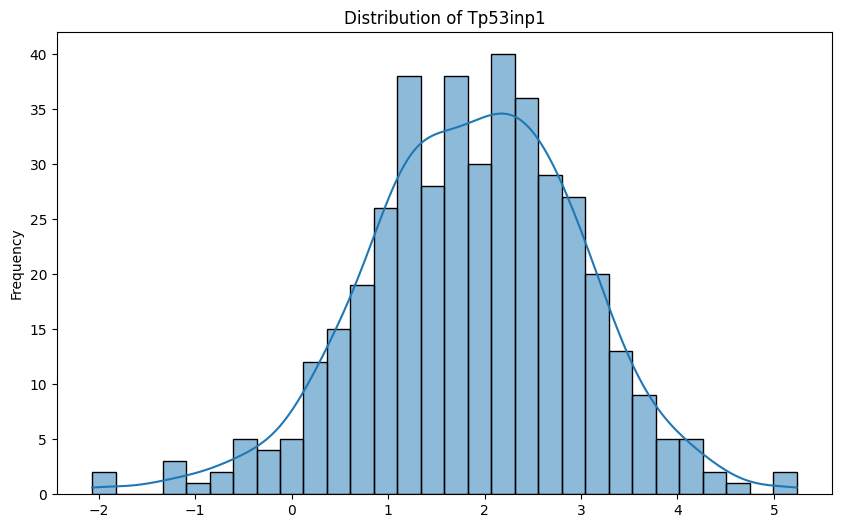

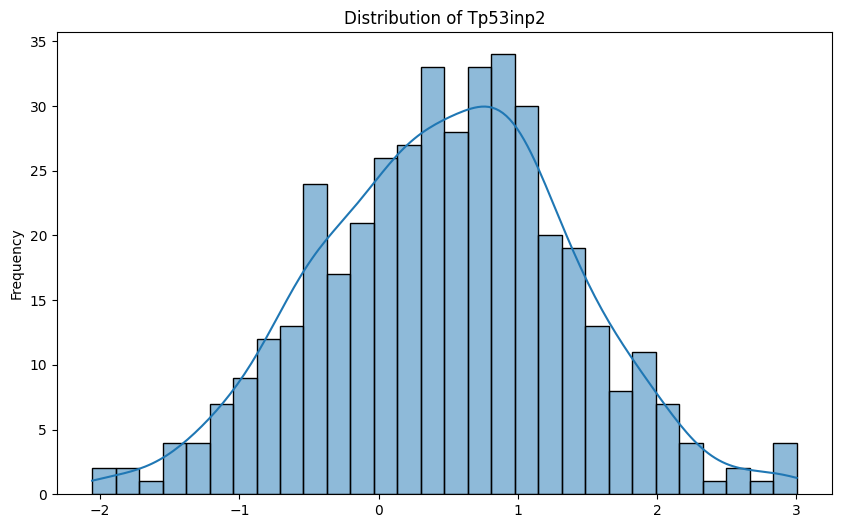

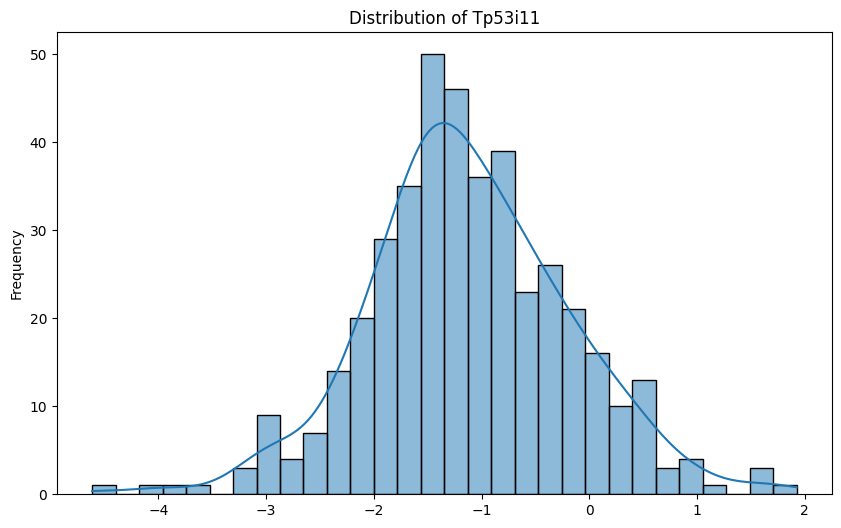

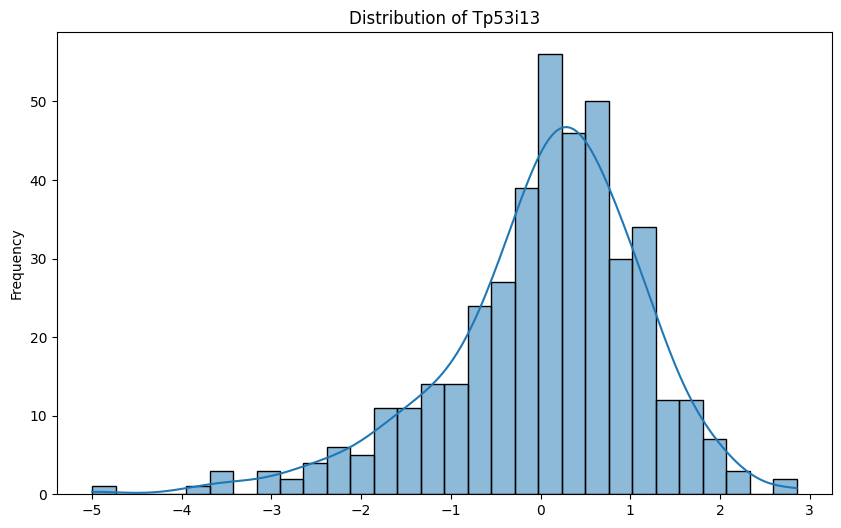

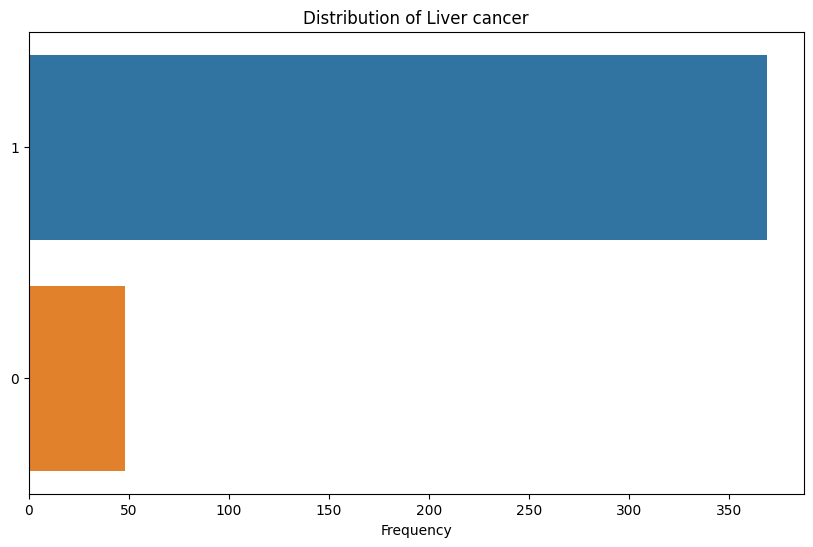

In [106]:
analyze_distributions(liver_merged_data, numerical_columns=[liver_condition_col, * liver_gene_list], categorical_columns=[liver_trait])

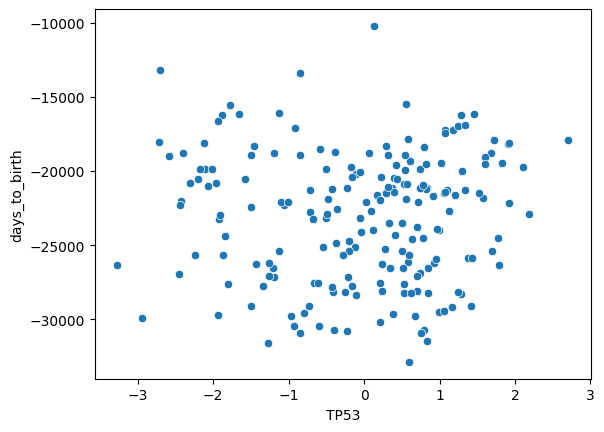

In [107]:
sns.scatterplot(data=esophageal_merged_data, x="TP53", y=esophageal_condition_col)
plt.show()

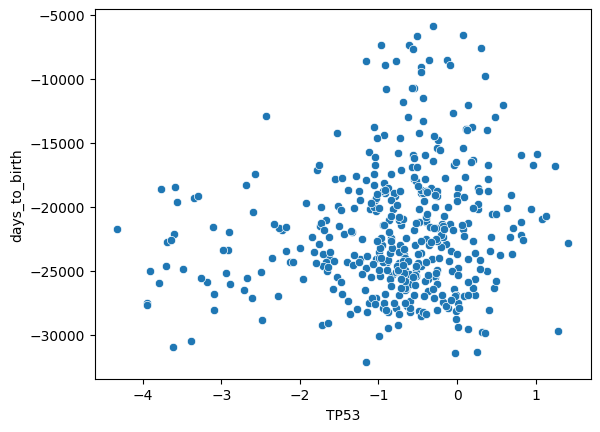

In [108]:
sns.scatterplot(data=liver_merged_data, x="TP53", y=liver_condition_col)
plt.show()

In [109]:
esophageal_merged_data[esophageal_condition_col] = (- esophageal_merged_data[esophageal_condition_col] / 365.25).astype(int)
esophageal_merged_data = esophageal_merged_data.rename(columns={esophageal_condition_col: esophageal_condition})
input_cols = esophageal_merged_data.columns.tolist()

esophageal_merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Esophageal Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,67,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812,1
TCGA-2H-A9GG-01,66,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812,1
TCGA-2H-A9GH-01,44,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788,1
TCGA-2H-A9GI-01,68,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788,1
TCGA-2H-A9GJ-01,57,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188,1


In [110]:
liver_merged_data[liver_condition_col] = (- liver_merged_data[liver_condition_col] / 365.25).astype(int)
liver_merged_data = liver_merged_data.rename(columns={liver_condition_col: liver_condition})
liver_input_cols = liver_merged_data.columns.tolist()

liver_merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Liver Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2Y-A9GS-01,58,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388,1
TCGA-2Y-A9GT-01,51,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188,1
TCGA-2Y-A9GU-01,55,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088,1
TCGA-2Y-A9GV-01,54,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688,1
TCGA-2Y-A9GW-01,64,1.946808,-2.720726,-0.531035,0.060628,-0.660778,-0.31181,-0.215794,0.756054,0.397301,...,1.082783,0.362567,-1.28139,-1.118377,-0.624886,0.903873,1.857205,-0.228533,0.692988,1


In [111]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = esophageal_merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = esophageal_merged_data[esophageal_trait].values
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))


<ipython-input-111-b44bc214b757>:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.8728468113083497


In [112]:
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [113]:
liver_data_array = liver_merged_data.values

# Normalize data
X_liver = liver_data_array
mean = np.mean(X_liver, axis=0)
std = np.std(X_liver, axis=0)
zero_std_columns = np.where(std == 0)[0]
X_liver = (X_liver - mean) / std
X_liver[:, zero_std_columns] = 0

y_liver = liver_merged_data[liver_trait].values
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X_liver.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X_liver[indices]
    y_shuffled = y_liver[indices]

    fold_size = len(X_liver) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(liver_data_array, y_liver))

<ipython-input-113-c213981cb502>:8: RuntimeWarning: invalid value encountered in divide
  X_liver = (X_liver - mean) / std


0.8087095369429524


In [114]:
var_select_liver = VariableSelection()

# Fit the model
var_select_liver.fit(X_liver, y_liver)

# Retrieve the coefficients
coefficients_liver = var_select_liver.getBeta().reshape(-1).tolist()
nlog_p_values_liver = var_select_liver.getNegLogP().reshape(-1).tolist()

In [115]:
gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if esophageal_gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if esophageal_condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {esophageal_gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {esophageal_condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For tp53:
TP53TG5: Coefficient = 0.018033860106997975, p-value = 0.0859312195629435
TP53TG3B: Coefficient = 0.01967705736715354, p-value = 0.2546588985399387
TP53TG1: Coefficient = 0.003861647628506871, p-value = 0.830148860297611
TP53BP1: Coefficient = 0.02945134526240202, p-value = 0.10385142835440216
TP53RK: Coefficient = -0.012446821460804273, p-value = 0.4374963360816476
TP53I3: Coefficient = -0.003444806269625475, p-value = 0.8514243047253792
TP53BP2: Coefficient = -0.0010164064248876505, p-value = 0.9492855088752742
TP53AIP1: Coefficient = -0.0032935747218414257, p-value = 0.9004804664260923
TP53: Coefficient = 0.012746615190612947, p-value = 0.2737977144163779
TP53INP1: Coefficient = 0.012915152979663752, p-value = 0.4789276429275885
TP53INP2: Coefficient = 0.03004779909369139, p-value = 0.11195276444684327
TP53I11: Coefficient = -0.007427652529371846, p-value = 0.6635240223031915
TP53I13: Coefficient = -0.00825880008556744, p-value = 0.620419216458135

For

In [116]:
liver_gene_result = []
liver_condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(liver_input_cols, coefficients_liver, nlog_p_values_liver):
    if liver_gene in var.lower():
        liver_gene_result.append((var, coef, np.exp(-nlogp)))
    if liver_condition == var.lower():
        liver_condition_result.append((var, coef, np.exp(-nlogp)))

liver_regression_report = "Regression Results:\n\n"
liver_regression_report += f"For {liver_gene}:\n"
for variable_name, coefficient, p_value in liver_gene_result:
    liver_regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

liver_regression_report += f"\nFor {liver_condition}:\n"
for variable_name, coefficient, p_value in liver_condition_result:
    liver_regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(liver_regression_report)

Regression Results:

For tp53:
TP53TG5: Coefficient = -0.023566352894022684, p-value = 0.001986874136467429
TP53TG3B: Coefficient = 0.003549469257266578, p-value = 0.785235986165416
TP53TG1: Coefficient = -0.014285623756282537, p-value = 0.35167343998507716
TP53BP1: Coefficient = 0.017147965979665513, p-value = 0.35232559091395554
TP53RK: Coefficient = 0.013736713736225795, p-value = 0.3207640113099192
TP53I3: Coefficient = 0.01831411795214026, p-value = 0.14549650489180324
TP53BP2: Coefficient = 0.00967640420221289, p-value = 0.5079560905216749
TP53AIP1: Coefficient = 0.009357985640167562, p-value = 0.3044582588548099
TP53: Coefficient = -0.0004894852075292429, p-value = 0.965939430007667
TP53INP1: Coefficient = -0.001864263322588623, p-value = 0.8915934473914598
TP53INP2: Coefficient = 0.0026282133004503364, p-value = 0.845902268729514
TP53I11: Coefficient = 0.002764591635192125, p-value = 0.8617066880469352
TP53I13: Coefficient = 0.002126443691157518, p-value = 0.8385393786410489

F

In [117]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {esophageal_gene} and {esophageal_trait} when considering the influence of {esophageal_condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {esophageal_gene} and {esophageal_trait} when considering the influence of {esophageal_condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {esophageal_gene} and {esophageal_trait} when considering the influence of {esophageal_condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between tp53 and Esophageal Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the tp53 and Esophageal Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the tp53 and Esophageal Cancer when considering the influence of age.




In [118]:
liver_hypotheses_text = f'Hypothesis\n\n'
liver_hypotheses_text += f'For the question "What is the relationship between {liver_gene} and {liver_trait} when considering the influence of {liver_condition}?", the following hypotheses can be proposed:\n\n'
liver_hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {liver_gene} and {liver_trait} when considering the influence of {liver_condition}.\n\n'
liver_hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {liver_gene} and {liver_trait} when considering the influence of {liver_condition}.\n\n'

print(liver_hypotheses_text)

Hypothesis

For the question "What is the relationship between tp53 and Liver Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the tp53 and Liver Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the tp53 and Liver Cancer when considering the influence of age.




In [119]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: TP53TG5
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53TG3B
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53TG1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53RK
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53I3
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP2
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53AIP1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53INP1
Coefficient i

In [120]:
liver_interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in liver_gene_result + liver_condition_result:
    liver_interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(liver_interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: TP53TG5
Coefficient is negative, and it is statistically significant (p-value < 0.05).

Variable: TP53TG3B
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53TG1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53RK
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53I3
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP2
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53AIP1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53INP1
Coefficient is neg

In [121]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {esophageal_gene_fullname} gene and {esophageal_trait} when considering the influence of {esophageal_condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {esophageal_gene_fullname} and {esophageal_trait} when considering the influence of {esophageal_condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: TP53TG5
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53 gene and Esophageal Cancer when considering the influence of age.

Variable: TP53TG3B
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53 gene and Esophageal Cancer when considering the influence of age.

Variable: TP53TG1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53 gene and Esophageal Cancer when considering the influence of age.

Variable: TP53BP1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53 gene and Esophageal Cancer when considering the influence of age.

Variable: TP53RK
Conclusion: H0 is not rejected: There is insufficient evi

In [122]:
def liver_confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {liver_gene_fullname} gene and {liver_trait} when considering the influence of {liver_condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {liver_gene_fullname} and {liver_trait} when considering the influence of {liver_condition}.\n\n"

liver_hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in liver_gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    liver_hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    liver_hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(liver_hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: TP53TG5
Conclusion: H1 is confirmed: There is an association between the expression of the TP53 and Esophageal Cancer when considering the influence of age.



Variable: TP53TG3B
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53 gene and Esophageal Cancer when considering the influence of age.

Variable: TP53TG1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53 gene and Esophageal Cancer when considering the influence of age.

Variable: TP53BP1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53 gene and Esophageal Cancer when considering the influence of age.

Variable: TP53RK
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between